In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in the data
df = pd.read_csv('data/merge.csv')

In [9]:
df.head()

,Product_Name,Sub_Fund_Name,Issuer,Auth_Date,Doc,Deriv_Fund,Product_ID,Sub_Fund_ID,doc_url,doc,...,id,subscription,switching,redemption,management,trustee,performance,admin,file_id,freq
0,Eastspring Investments (APD368),Eastspring Investments - Global Low Volatility...,Eastspring Investments (Luxembourg) S.A.,2022-01-11,Offering Documents,No,APD368,BSX598,https://apps.sfc.hk/productlistWeb/searchProdu...,1.0,...,BSX598,5%,0,0,1.00%,0,0,0,BSX598,daily
1,BlackRock Global Funds (AAR239),China Innovation Fund (BSX533),BlackRock (Luxembourg) S.A.,2022-10-26,Offering Documents,No,AAR239,BSX533,https://apps.sfc.hk/productlistWeb/searchProdu...,1.0,...,BSX533,5%,0,0,1.50%,0,0,0,BSX533,daily
2,BlackRock Global Funds (AAR239),China Onshore Bond Fund (BSY415),BlackRock (Luxembourg) S.A.,2022-10-26,Offering Documents,No,AAR239,BSY415,https://apps.sfc.hk/productlistWeb/searchProdu...,1.0,...,BSY415,5%,0,0,1.00%,0,0,0,BSY415,daily
3,BlackRock Global Funds (AAR239),Next Generation Health Care Fund (BSX534),BlackRock (Luxembourg) S.A.,2022-10-26,Offering Documents,No,AAR239,BSX534,https://apps.sfc.hk/productlistWeb/searchProdu...,1.0,...,BSX534,5%,0,0,1.50%,0,0,0,BSX534,daily
4,BlackRock Global Funds (AAR239),Sustainable Global Infrastructure Fund (BSY416),BlackRock (Luxembourg) S.A.,2022-10-26,Offering Documents,No,AAR239,BSY416,https://apps.sfc.hk/productlistWeb/searchProdu...,1.0,...,BSY416,5%,0,0,1.20%,0,0,0,BSY416,daily


In [13]:
# if a row has nan, delete it
df = df.dropna()

In [14]:
df.to_csv('data/merge1.csv', index=False)

In [28]:
# transform datetime into year
#df['year'] = pd.DatetimeIndex(df['Auth_Date']).year

#df['year'] = df['Auth_Date'].apply(lambda x: x.split('-')[0])
# stats by year
#year = df.groupby('year').count()

# number of different issuer in df
df.groupby('Issuer').count()


,Product_Name,Sub_Fund_Name,Auth_Date,Doc,Deriv_Fund,Product_ID,Sub_Fund_ID,doc_url,doc,name,...,subscription,switching,redemption,management,trustee,performance,admin,file_id,freq,year
Issuer,,,,,,,,,,,,,,,,,,,,,
AIA Investment Management HK Limited,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
AXA Funds Management S.A.,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
AXA Investment Managers Asia Limited,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Abrdn Investments Luxembourg S.A.,37,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37
AllianceBernstein (Luxembourg) S.a.r.l.,46,46,46,46,46,46,46,46,46,46,...,46,46,46,46,46,46,46,46,46,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UBS Fund Management (Luxembourg) S.A.,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
VL Asset Management Limited,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Value Partners Hong Kong Limited,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6


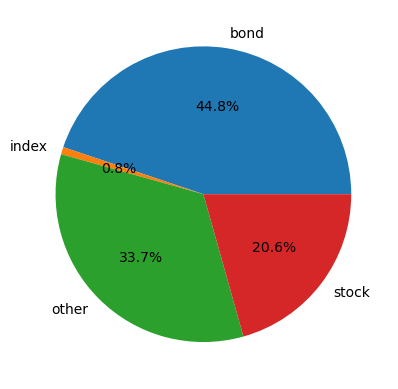

In [54]:
# number of type = stock 2018-2022
a = df.loc[df['year']>2019].groupby(['fund_type']).count()
#df.loc[df['fund_type'] == 'index'].groupby(['fund_type', 'year']).count()
# pie chart of a
plt.pie(a['Issuer'], labels=a.index, autopct='%1.1f%%')
#store the figure
plt.savefig('fig/type_3yr.png')

<AxesSubplot:xlabel='year'>

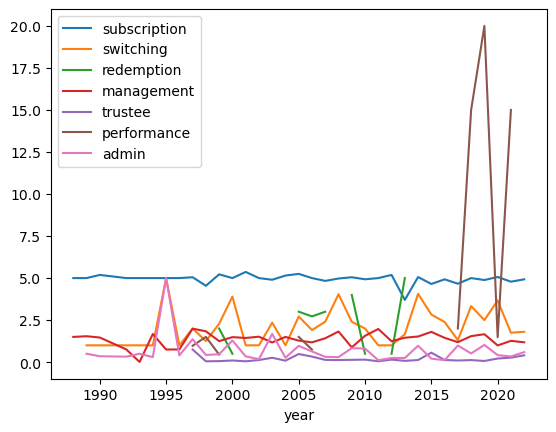

In [73]:
fee_list = ['subscription', 'switching', 'redemption', 'management', 'trustee', 'performance', 'admin']
# mean of fee_list in df grouped by year
# '5%' to 5
#df[fee_list] = df[fee_list].apply(lambda x: x.str.replace('%', '').astype(float))
#fee = df.loc[df['fund_type'] == 'bond'].groupby('year')[fee_list].mean()
# only calculate the mean of non-zero values
fee = df.loc[df['fund_type'] == 'stock'].groupby('year')[fee_list].agg(lambda x: np.mean(x[x>0]))
# plot fee using plt
fee.plot()

#save the figure



In [59]:
fee